In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the prepared dataset with technical indicators
df = pd.read_csv("stock_data_prepared_for_training.csv", parse_dates=['published_date'])
df['company_id'] = df['company_id'].astype('category')

print(f"Dataset shape: {df.shape}")
print(f"Number of companies: {df['company_id'].nunique()}")
print(f"Date range: {df['published_date'].min()} to {df['published_date'].max()}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nTarget distribution:")
print(df['target'].value_counts())

df.dtypes

Dataset shape: (52043, 22)
Number of companies: 17
Date range: 2009-09-27 00:00:00 to 2025-12-28 00:00:00

Columns: ['published_date', 'company_id', 'target', 'pct_change_next', 'open', 'high', 'low', 'close', 'per_change', 'traded_quantity', 'traded_amount', 'daily_range', 'ma_5', 'ma_20', 'rsi_14', 'macd', 'bb_position', 'atr_normalized', 'volume_ratio', 'return_5d', 'price_to_ma20', 'trend_strength']

Target distribution:
target
0    29985
1    22058
Name: count, dtype: int64


published_date     datetime64[ns]
company_id               category
target                      int64
pct_change_next           float64
open                      float64
high                      float64
low                       float64
close                     float64
per_change                float64
traded_quantity           float64
traded_amount             float64
daily_range               float64
ma_5                      float64
ma_20                     float64
rsi_14                    float64
macd                      float64
bb_position               float64
atr_normalized            float64
volume_ratio              float64
return_5d                 float64
price_to_ma20             float64
trend_strength            float64
dtype: object

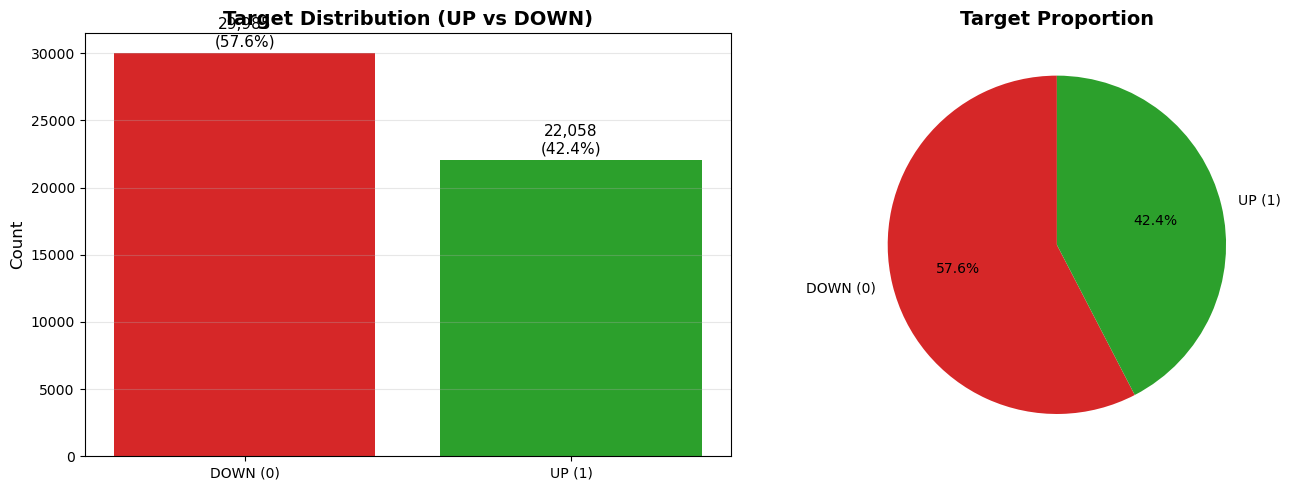

In [2]:
# Target Distribution Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
target_counts = df['target'].value_counts()
axes[0].bar(['DOWN (0)', 'UP (1)'], target_counts.values, color=['#d62728', '#2ca02c'])
axes[0].set_title('Target Distribution (UP vs DOWN)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 500, f'{v:,}\n({v/len(df)*100:.1f}%)', ha='center', fontsize=11)

# Pie chart
axes[1].pie(target_counts.values, labels=['DOWN (0)', 'UP (1)'], autopct='%1.1f%%',
            colors=['#d62728', '#2ca02c'], startangle=90)
axes[1].set_title('Target Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

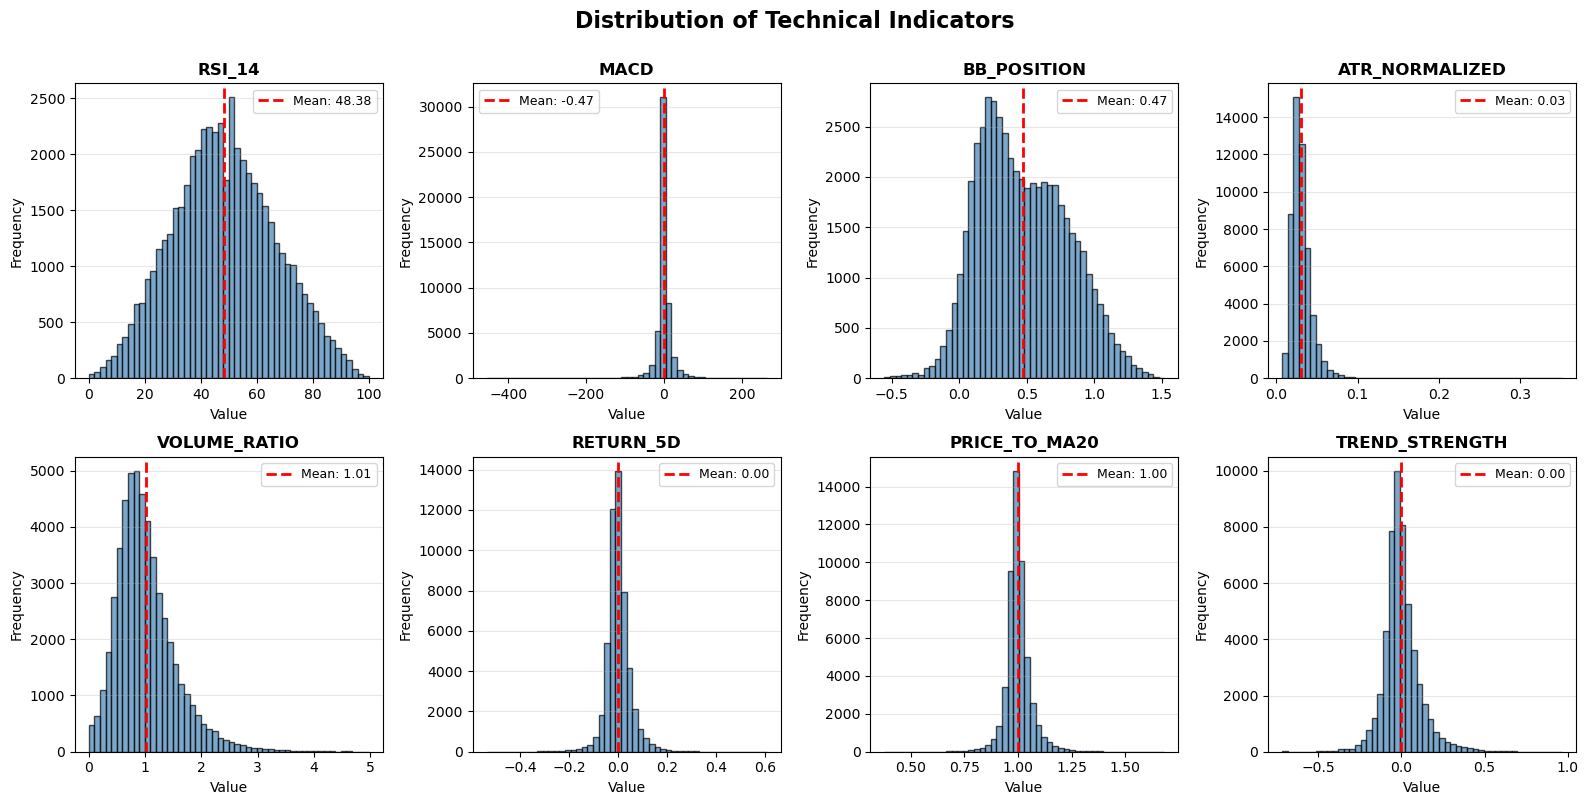

In [3]:
# Technical Indicators Distribution
technical_features = ['rsi_14', 'macd', 'bb_position', 'atr_normalized', 
                      'volume_ratio', 'return_5d', 'price_to_ma20', 'trend_strength']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, feat in enumerate(technical_features):
    axes[i].hist(df[feat].dropna(), bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    axes[i].set_title(feat.upper(), fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Value', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)
    
    # Add mean line
    mean_val = df[feat].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].legend(fontsize=9)

plt.suptitle('Distribution of Technical Indicators', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [4]:
companies = df['company_id'].unique()
companies

['ADBL', 'CZBIL', 'EBL', 'GBIME', 'HBL', ..., 'PRVU', 'SANIMA', 'SBI', 'SBL', 'SCB']
Length: 17
Categories (17, object): ['ADBL', 'CZBIL', 'EBL', 'GBIME', ..., 'SANIMA', 'SBI', 'SBL', 'SCB']

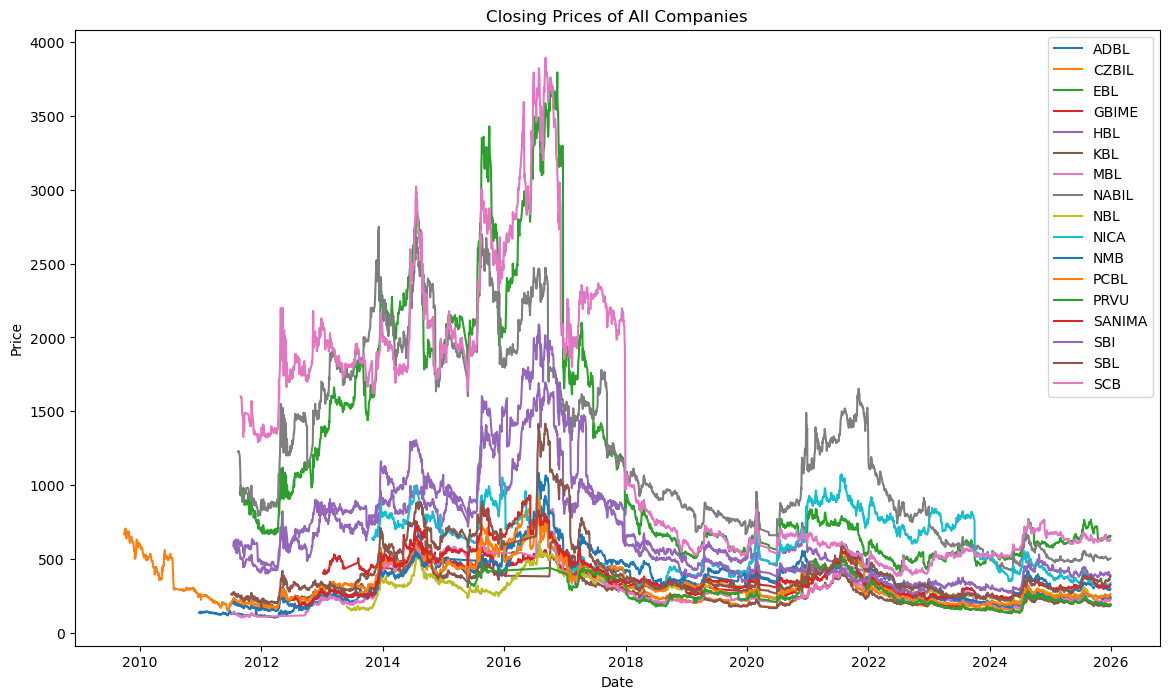

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))
for company in companies:
    comp_df = df[df['company_id'] == company]
    plt.plot(comp_df['published_date'], comp_df['close'], label=company)

plt.title('Closing Prices of All Companies')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


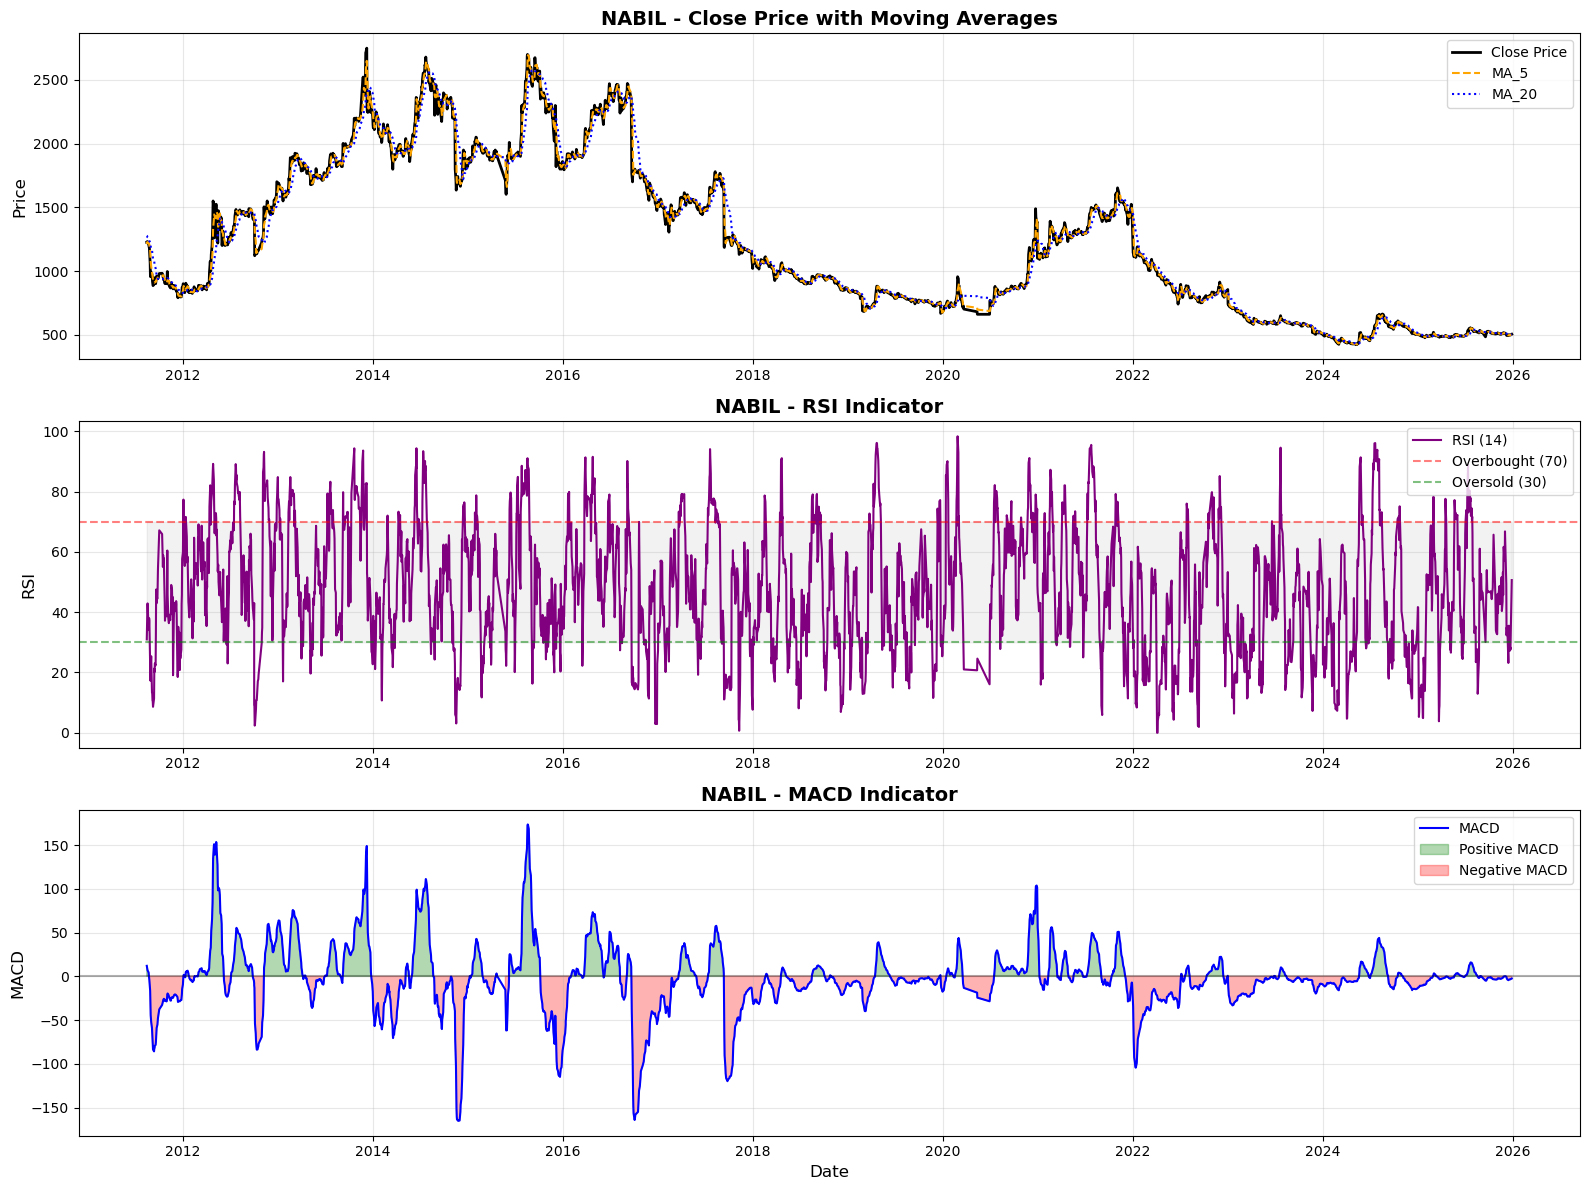

In [6]:
# Price with Moving Averages and Technical Indicators
sample_company = 'NABIL'
comp_df = df[df['company_id'] == sample_company].copy()

fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# Plot 1: Price with Moving Averages
axes[0].plot(comp_df['published_date'], comp_df['close'], label='Close Price', linewidth=2, color='black')
axes[0].plot(comp_df['published_date'], comp_df['ma_5'], '--', label='MA_5', linewidth=1.5, color='orange')
axes[0].plot(comp_df['published_date'], comp_df['ma_20'], ':', label='MA_20', linewidth=1.5, color='blue')
axes[0].set_title(f'{sample_company} - Close Price with Moving Averages', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot 2: RSI
axes[1].plot(comp_df['published_date'], comp_df['rsi_14'], label='RSI (14)', linewidth=1.5, color='purple')
axes[1].axhline(70, color='red', linestyle='--', alpha=0.5, label='Overbought (70)')
axes[1].axhline(30, color='green', linestyle='--', alpha=0.5, label='Oversold (30)')
axes[1].fill_between(comp_df['published_date'], 30, 70, alpha=0.1, color='gray')
axes[1].set_title(f'{sample_company} - RSI Indicator', fontsize=14, fontweight='bold')
axes[1].set_ylabel('RSI', fontsize=12)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

# Plot 3: MACD
axes[2].plot(comp_df['published_date'], comp_df['macd'], label='MACD', linewidth=1.5, color='blue')
axes[2].axhline(0, color='black', linestyle='-', alpha=0.3)
axes[2].fill_between(comp_df['published_date'], comp_df['macd'], 0, 
                     where=(comp_df['macd'] >= 0), color='green', alpha=0.3, label='Positive MACD')
axes[2].fill_between(comp_df['published_date'], comp_df['macd'], 0, 
                     where=(comp_df['macd'] < 0), color='red', alpha=0.3, label='Negative MACD')
axes[2].set_title(f'{sample_company} - MACD Indicator', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Date', fontsize=12)
axes[2].set_ylabel('MACD', fontsize=12)
axes[2].legend(fontsize=10)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

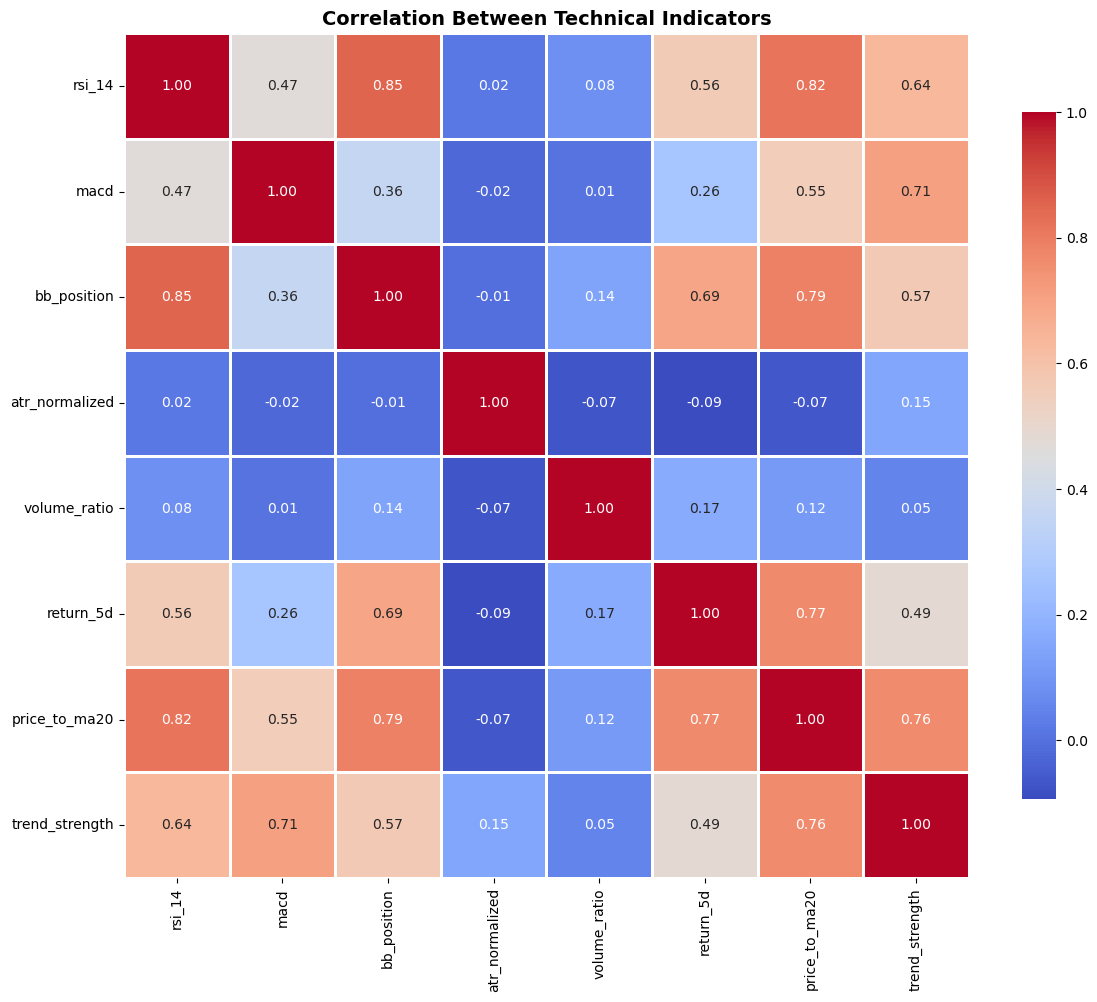

In [7]:
# Correlation Heatmap of Technical Indicators
technical_features = ['rsi_14', 'macd', 'bb_position', 'atr_normalized', 
                      'volume_ratio', 'return_5d', 'price_to_ma20', 'trend_strength']

corr_tech = df[technical_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_tech, annot=True, cmap='coolwarm', fmt=".2f", 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Between Technical Indicators', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

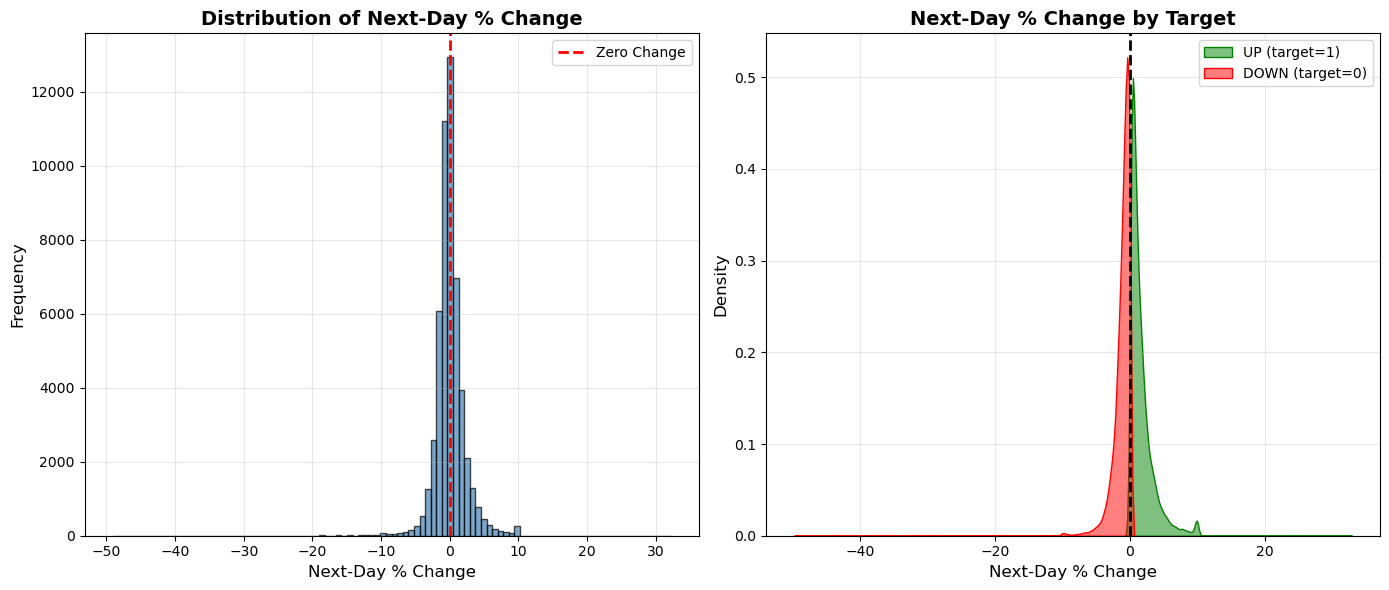

Mean next-day change for UP: 1.680%
Mean next-day change for DOWN: -1.206%


In [8]:
# Distribution of Next-Day Percentage Change
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['pct_change_next'].dropna(), bins=100, color='steelblue', alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Change')
plt.title('Distribution of Next-Day % Change', fontsize=14, fontweight='bold')
plt.xlabel('Next-Day % Change', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# KDE plot by target
plt.subplot(1, 2, 2)
df_up = df[df['target'] == 1]['pct_change_next'].dropna()
df_down = df[df['target'] == 0]['pct_change_next'].dropna()

sns.kdeplot(df_up, label='UP (target=1)', fill=True, alpha=0.5, color='green')
sns.kdeplot(df_down, label='DOWN (target=0)', fill=True, alpha=0.5, color='red')
plt.axvline(0, color='black', linestyle='--', linewidth=2)
plt.title('Next-Day % Change by Target', fontsize=14, fontweight='bold')
plt.xlabel('Next-Day % Change', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Mean next-day change for UP: {df_up.mean():.3f}%")
print(f"Mean next-day change for DOWN: {df_down.mean():.3f}%")

/var/folders/v6/ysk00rgx4q94z23s64yw39gw0000gn/T/ipykernel_33366/2917656889.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(data_to_plot, labels=['DOWN (0)', 'UP (1)'],
/var/folders/v6/ysk00rgx4q94z23s64yw39gw0000gn/T/ipykernel_33366/2917656889.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(data_to_plot, labels=['DOWN (0)', 'UP (1)'],
/var/folders/v6/ysk00rgx4q94z23s64yw39gw0000gn/T/ipykernel_33366/2917656889.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[i].boxplot(data_to_plot, labels=['DOWN (0)', 'UP (1)'],
/var/folders/v6/ysk00rgx4q94z23s64yw39gw

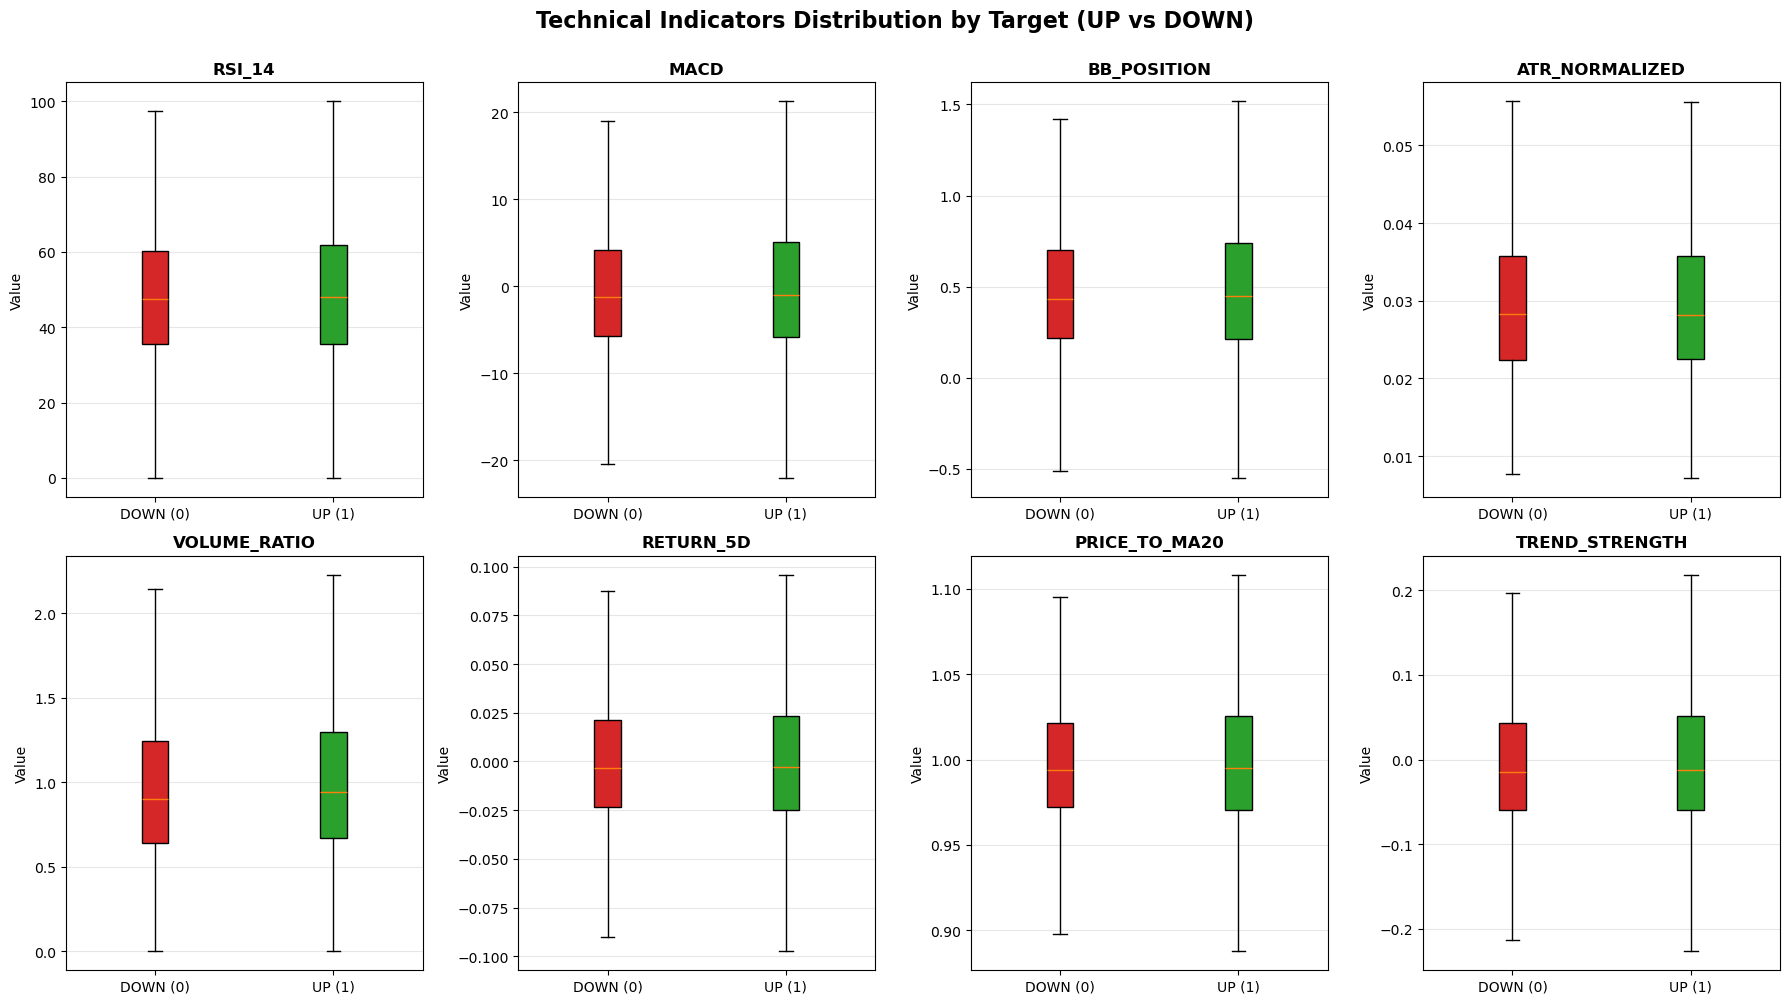

In [12]:
# Feature Importance - Box plots by Target
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

technical_features = ['rsi_14', 'macd', 'bb_position', 'atr_normalized', 
                      'volume_ratio', 'return_5d', 'price_to_ma20', 'trend_strength']

for i, feat in enumerate(technical_features):
    data_to_plot = [df[df['target'] == 0][feat].dropna(), 
                     df[df['target'] == 1][feat].dropna()]
    
    bp = axes[i].boxplot(data_to_plot, labels=['DOWN (0)', 'UP (1)'], 
                         patch_artist=True, showfliers=False)
    
    # Color boxes
    bp['boxes'][0].set_facecolor('#d62728')
    bp['boxes'][1].set_facecolor('#2ca02c')
    
    axes[i].set_title(feat.upper(), fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Value', fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)

plt.suptitle('Technical Indicators Distribution by Target (UP vs DOWN)', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

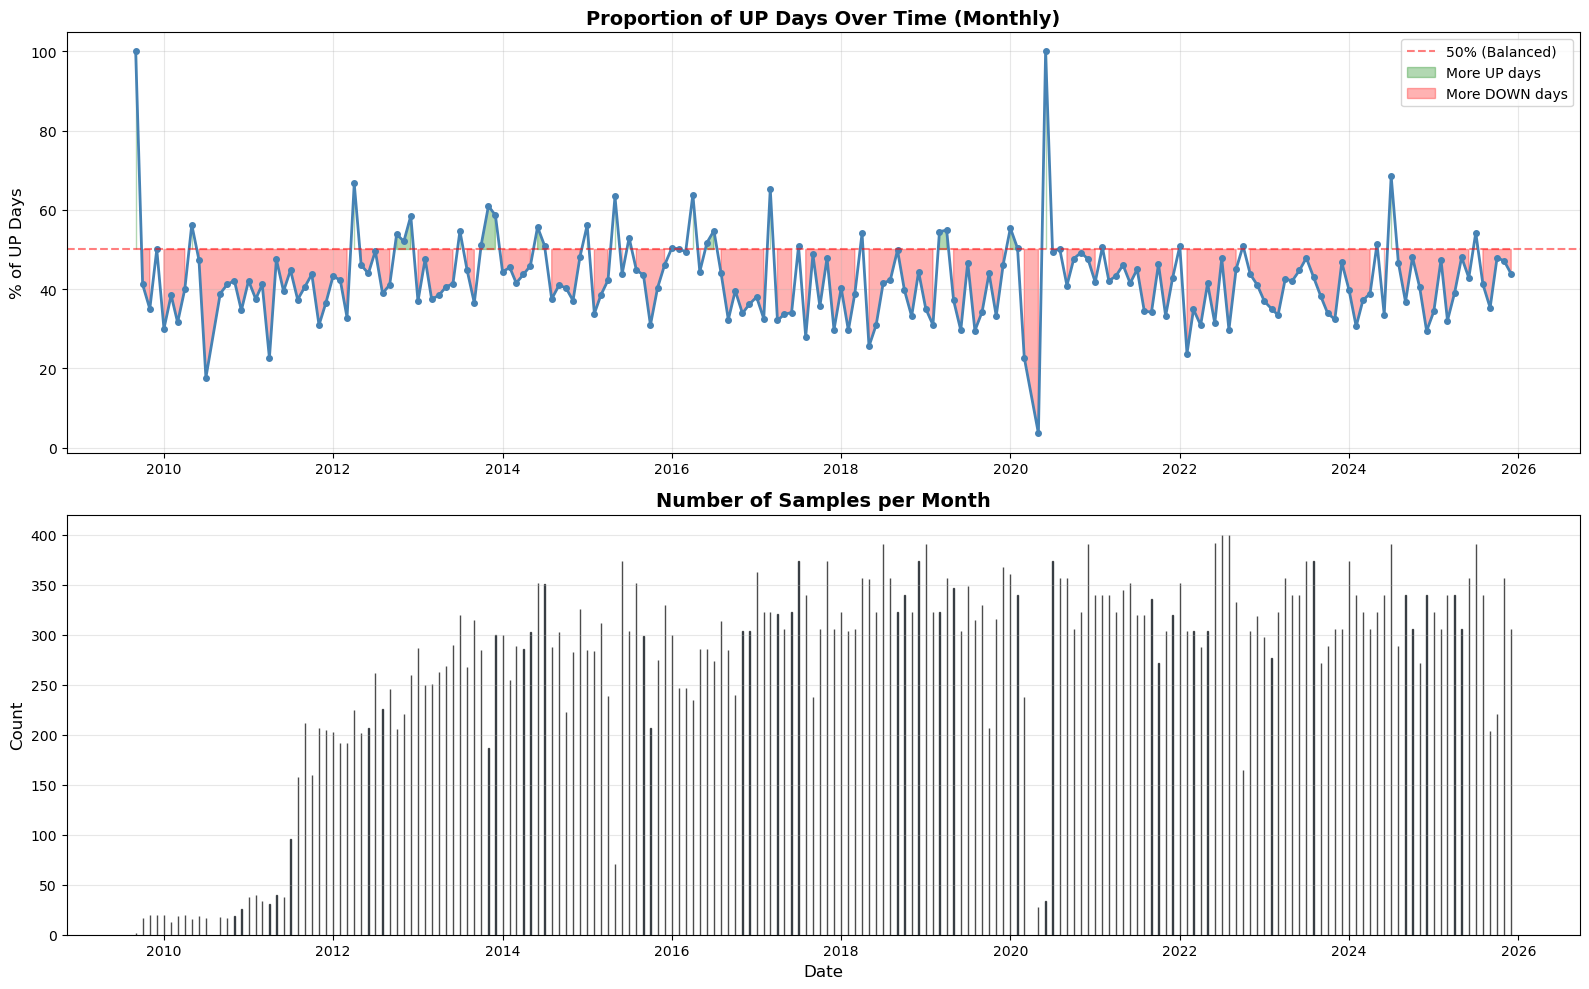


Overall UP percentage: 42.38%
Average samples per month: 268


In [11]:
# Time Series Analysis - Target Distribution Over Time
df_monthly = df.copy()
df_monthly['year_month'] = df_monthly['published_date'].dt.to_period('M')

# Calculate monthly target distribution
monthly_target = df_monthly.groupby('year_month')['target'].agg(['mean', 'count']).reset_index()
monthly_target['year_month'] = monthly_target['year_month'].dt.to_timestamp()

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Proportion of UP days over time
axes[0].plot(monthly_target['year_month'], monthly_target['mean'] * 100, 
             linewidth=2, color='steelblue', marker='o', markersize=4)
axes[0].axhline(50, color='red', linestyle='--', alpha=0.5, label='50% (Balanced)')
axes[0].fill_between(monthly_target['year_month'], monthly_target['mean'] * 100, 50, 
                     where=(monthly_target['mean'] * 100 >= 50), alpha=0.3, color='green', label='More UP days')
axes[0].fill_between(monthly_target['year_month'], monthly_target['mean'] * 100, 50, 
                     where=(monthly_target['mean'] * 100 < 50), alpha=0.3, color='red', label='More DOWN days')
axes[0].set_title('Proportion of UP Days Over Time (Monthly)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('% of UP Days', fontsize=12)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot 2: Number of samples per month
axes[1].bar(monthly_target['year_month'], monthly_target['count'], 
            color='steelblue', alpha=0.7, edgecolor='black')
axes[1].set_title('Number of Samples per Month', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nOverall UP percentage: {df['target'].mean() * 100:.2f}%")
print(f"Average samples per month: {monthly_target['count'].mean():.0f}")